In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [4]:
train_data.shape

(19104, 13)

In [5]:
test_data = pd.read_csv('test.csv')
test_data.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [6]:
test_data.shape

(741, 1)

In [7]:
sub_data = pd.read_csv('sample_sub.csv')
sub_data.head()

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0


In [8]:
train_data.describe()

,Emp_ID,Age,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.650283,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.264471,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [10]:
round(100*train_data.isnull().sum()/train_data.shape[0],2)

MMM-YY                   0.00
Emp_ID                   0.00
Age                      0.00
Gender                   0.00
City                     0.00
Education_Level          0.00
Salary                   0.00
Dateofjoining            0.00
LastWorkingDate         91.54
Joining Designation      0.00
Designation              0.00
Total Business Value     0.00
Quarterly Rating         0.00
dtype: float64

In [11]:
train_data['Target'] =  np.where(train_data['LastWorkingDate'].isnull(),0,1)
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,0


In [12]:
train_data['MMM-YY'] = pd.to_datetime(train_data['MMM-YY'],format='%Y-%m-%d')
train_data['Dateofjoining'] = pd.to_datetime(train_data['Dateofjoining'],format='%Y-%m-%d')
train_data['LastWorkingDate'] = pd.to_datetime(train_data['LastWorkingDate'],format='%Y-%m-%d',errors='coerce')
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Target          

In [14]:
train_data.head(100)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,0,1,0
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaT,2,2,350000,1,0
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1


In [15]:
train_data[train_data['Target']==1]

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,1
12,2016-03-01,5,29,Male,C9,College,46368,2016-01-09,2016-03-07,1,1,0,1,1
20,2017-11-01,8,34,Male,C2,College,70656,2017-09-19,2017-11-15,3,3,0,1,1
27,2016-12-01,12,35,Male,C23,Master,28116,2016-06-29,2016-12-21,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19039,2017-02-01,2779,28,Male,C26,College,95133,2017-01-26,2017-02-14,3,3,0,1,1
19054,2016-08-01,2782,26,Male,C19,Bachelor,29582,2016-05-16,2016-08-16,1,1,0,1,1
19081,2017-10-01,2785,34,Female,C9,College,12105,2017-08-28,2017-10-28,1,1,0,1,1
19090,2016-09-01,2786,45,Male,C19,College,35370,2015-07-31,2016-09-22,2,2,0,1,1


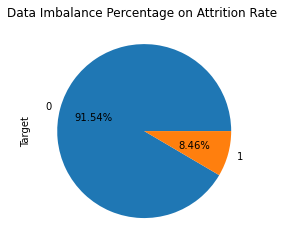

In [16]:
plt.title("Data Imbalance Percentage on Attrition Rate ")
train_data['Target'].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.show()

**Univariate Analysis**

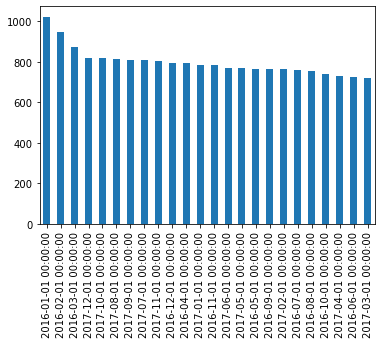

In [17]:
train_data['MMM-YY'].value_counts().plot.bar();

In [18]:
train_data['MMM-YY'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-09-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2016-07-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-11-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-06-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [19]:
train_data['Emp_ID'].value_counts()

2049    24
1191    24
1655    24
926     24
1623    24
        ..
1448     1
748      1
930      1
962      1
1194     1
Name: Emp_ID, Length: 2381, dtype: int64

In [20]:
train_data['Emp_ID'].unique()

array([   1,    2,    4, ..., 2786, 2787, 2788])

In [21]:
len(train_data['Emp_ID'].unique())

2381

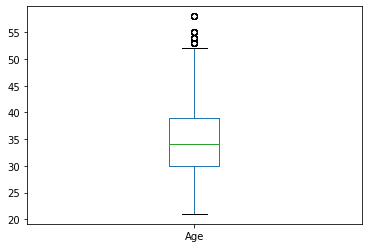

In [22]:
train_data['Age'].plot.box();

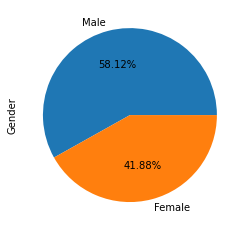

In [23]:
train_data['Gender'].value_counts(normalize=True).plot.pie(autopct="%.2f%%");

In [24]:
train_data['City'].value_counts()

C20    1008
C29     900
C26     869
C22     809
C27     786
C15     761
C10     744
C12     727
C8      712
C16     709
C28     683
C1      677
C6      660
C5      656
C14     648
C3      637
C24     614
C7      609
C21     603
C25     584
C19     579
C4      578
C13     569
C18     544
C23     538
C9      520
C2      472
C11     468
C17     440
Name: City, dtype: int64

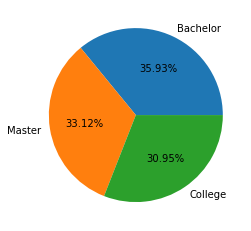

In [25]:
train_data['Education_Level'].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.ylabel('')
plt.show()

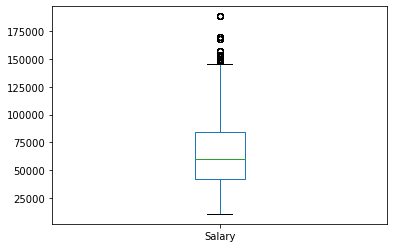

In [26]:
train_data['Salary'].plot.box();

In [27]:
train_data['Designation'].value_counts(normalize=True)*100


2    34.689070
1    27.229899
3    25.261725
4    11.222781
5     1.596524
Name: Designation, dtype: float64

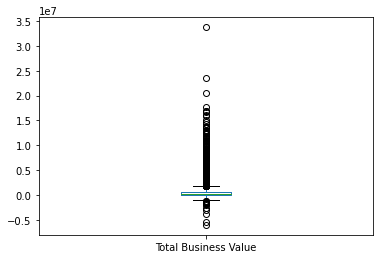

In [28]:
train_data['Total Business Value'].plot.box();

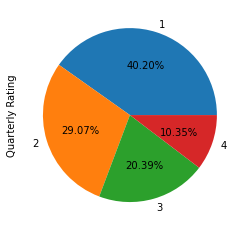

In [29]:
train_data['Quarterly Rating'].value_counts(normalize=True).plot.pie(autopct="%.2f%%");

**Feature Engineering**

In [30]:
train_data['Duration_Worked'] = (train_data['LastWorkingDate']-train_data['Dateofjoining']).dt.days
train_data.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target,Duration_Worked
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,2381060,2,0,NaN
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaT,1,1,-665480,2,0,NaN
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,1,78.0
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,NaN
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaT,2,2,0,1,0,NaN


In [31]:
employee_agg_data = train_data.groupby(['Emp_ID','Gender','City','Education_Level','Dateofjoining']).agg(avg_age=('Age',np.mean),min_salary=('Salary',np.min),
                                                     max_salary=('Salary',np.max),start_designation=('Joining Designation',np.min),
                                                     end_designation=('Designation',np.max),net_bussiness_val=('Total Business Value',np.mean),
                                                     avg_rating=('Quarterly Rating',np.mean),target=('Target',np.max),avg_duration=('Duration_Worked',np.mean),
                                                     first_rating=('Quarterly Rating','first'),last_rating=('Quarterly Rating','last'),last_reported=('MMM-YY','last')).reset_index()
employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,first_rating,last_rating,last_reported
0,1,Male,C23,Master,2015-12-24,28.0,57387,57387,1,1,571860.0,2.0,1,78.0,2,2,2016-03-01
1,2,Male,C7,Master,2017-11-06,31.0,67016,67016,2,2,0.0,1.0,0,NaN,1,1,2017-12-01
2,4,Male,C13,Master,2016-12-07,43.0,65603,65603,2,2,70000.0,1.0,1,141.0,1,1,2017-04-01
3,5,Male,C9,College,2016-01-09,29.0,46368,46368,1,1,40120.0,1.0,1,58.0,1,1,2016-03-01
4,6,Female,C11,Bachelor,2017-07-31,31.0,78728,78728,3,3,253000.0,1.6,0,NaN,1,2,2017-12-01


In [32]:
employee_agg_data.shape

(2381, 17)

In [33]:
max(train_data['MMM-YY'])

Timestamp('2017-12-01 00:00:00')

In [34]:
employee_agg_data.Dateofjoining.max()

Timestamp('2017-12-28 00:00:00')

In [35]:
employee_agg_data['avg_duration'].fillna((employee_agg_data['last_reported']-employee_agg_data['Dateofjoining']).dt.days,inplace=True)
employee_agg_data['avg_duration'] = employee_agg_data['avg_duration']/365
employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,first_rating,last_rating,last_reported
0,1,Male,C23,Master,2015-12-24,28.0,57387,57387,1,1,571860.0,2.0,1,0.213699,2,2,2016-03-01
1,2,Male,C7,Master,2017-11-06,31.0,67016,67016,2,2,0.0,1.0,0,0.068493,1,1,2017-12-01
2,4,Male,C13,Master,2016-12-07,43.0,65603,65603,2,2,70000.0,1.0,1,0.386301,1,1,2017-04-01
3,5,Male,C9,College,2016-01-09,29.0,46368,46368,1,1,40120.0,1.0,1,0.158904,1,1,2016-03-01
4,6,Female,C11,Bachelor,2017-07-31,31.0,78728,78728,3,3,253000.0,1.6,0,0.336986,1,2,2017-12-01


In [36]:
employee_agg_data.drop('last_reported',axis=1,inplace=True)

In [37]:
employee_agg_data['salary_hike_flag'] = (employee_agg_data['max_salary']-employee_agg_data['min_salary'])
employee_agg_data['salary_hike_flag'] =  np.where(employee_agg_data['salary_hike_flag']>0,1,0)
employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,first_rating,last_rating,salary_hike_flag
0,1,Male,C23,Master,2015-12-24,28.0,57387,57387,1,1,571860.0,2.0,1,0.213699,2,2,0
1,2,Male,C7,Master,2017-11-06,31.0,67016,67016,2,2,0.0,1.0,0,0.068493,1,1,0
2,4,Male,C13,Master,2016-12-07,43.0,65603,65603,2,2,70000.0,1.0,1,0.386301,1,1,0
3,5,Male,C9,College,2016-01-09,29.0,46368,46368,1,1,40120.0,1.0,1,0.158904,1,1,0
4,6,Female,C11,Bachelor,2017-07-31,31.0,78728,78728,3,3,253000.0,1.6,0,0.336986,1,2,0


In [38]:
employee_agg_data['salary_hike_flag'].value_counts(normalize=True)*100

0    98.152037
1     1.847963
Name: salary_hike_flag, dtype: float64

In [39]:
def rating_func(x):
    if x==0:
        return 'No Improvement'
    elif x>0:
        return 'Improved'
    else:
        return 'Dropped'
    
employee_agg_data['rating_flag'] = employee_agg_data['last_rating']-employee_agg_data['first_rating']
employee_agg_data['rating_flag'] = employee_agg_data['rating_flag'].apply(rating_func)
employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,first_rating,last_rating,salary_hike_flag,rating_flag
0,1,Male,C23,Master,2015-12-24,28.0,57387,57387,1,1,571860.0,2.0,1,0.213699,2,2,0,No Improvement
1,2,Male,C7,Master,2017-11-06,31.0,67016,67016,2,2,0.0,1.0,0,0.068493,1,1,0,No Improvement
2,4,Male,C13,Master,2016-12-07,43.0,65603,65603,2,2,70000.0,1.0,1,0.386301,1,1,0,No Improvement
3,5,Male,C9,College,2016-01-09,29.0,46368,46368,1,1,40120.0,1.0,1,0.158904,1,1,0,No Improvement
4,6,Female,C11,Bachelor,2017-07-31,31.0,78728,78728,3,3,253000.0,1.6,0,0.336986,1,2,0,Improved


In [40]:
employee_agg_data.drop(['first_rating','last_rating'],axis=1,inplace=True)
employee_agg_data.head(10)

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag
0,1,Male,C23,Master,2015-12-24,28.000000,57387,57387,1,1,571860.000000,2.00000,1,0.213699,0,No Improvement
1,2,Male,C7,Master,2017-11-06,31.000000,67016,67016,2,2,0.000000,1.00000,0,0.068493,0,No Improvement
2,4,Male,C13,Master,2016-12-07,43.000000,65603,65603,2,2,70000.000000,1.00000,1,0.386301,0,No Improvement
3,5,Male,C9,College,2016-01-09,29.000000,46368,46368,1,1,40120.000000,1.00000,1,0.158904,0,No Improvement
4,6,Female,C11,Bachelor,2017-07-31,31.000000,78728,78728,3,3,253000.000000,1.60000,0,0.336986,0,Improved
5,8,Male,C2,College,2017-09-19,34.000000,70656,70656,3,3,0.000000,1.00000,1,0.156164,0,No Improvement
6,11,Female,C19,Master,2017-12-07,28.000000,42172,42172,1,1,0.000000,1.00000,0,-0.016438,0,No Improvement
7,12,Male,C23,Master,2016-06-29,35.000000,28116,28116,1,1,434530.000000,2.50000,1,0.479452,0,Dropped
8,13,Male,C19,Master,2012-05-28,29.608696,119227,119227,1,4,444045.217391,1.26087,1,5.498630,0,No Improvement
9,14,Female,C26,College,2017-10-16,39.000000,19734,19734,3,3,0.000000,1.00000,0,0.126027,0,No Improvement


In [41]:
employee_agg_data['rating_flag'].value_counts(normalize=True)*100

No Improvement    65.728685
Dropped           19.235615
Improved          15.035699
Name: rating_flag, dtype: float64

In [42]:
employee_agg_data['promotion_flag'] = employee_agg_data['end_designation']-employee_agg_data['start_designation']
employee_agg_data['promotion_flag'] = np.where(employee_agg_data['promotion_flag']>0,1,0)
employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag
0,1,Male,C23,Master,2015-12-24,28.0,57387,57387,1,1,571860.0,2.0,1,0.213699,0,No Improvement,0
1,2,Male,C7,Master,2017-11-06,31.0,67016,67016,2,2,0.0,1.0,0,0.068493,0,No Improvement,0
2,4,Male,C13,Master,2016-12-07,43.0,65603,65603,2,2,70000.0,1.0,1,0.386301,0,No Improvement,0
3,5,Male,C9,College,2016-01-09,29.0,46368,46368,1,1,40120.0,1.0,1,0.158904,0,No Improvement,0
4,6,Female,C11,Bachelor,2017-07-31,31.0,78728,78728,3,3,253000.0,1.6,0,0.336986,0,Improved,0


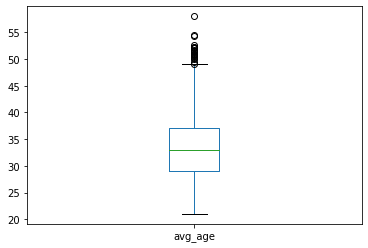

In [43]:
employee_agg_data['avg_age'].plot.box();

In [44]:
cut_labels_age = ['20-30', '30-40', '40-50','50+']
cut_bins = [20,30,40,50,100]
employee_agg_data['age_groups'] = pd.cut(employee_agg_data['avg_age'], bins=cut_bins, labels=cut_labels_age)

In [45]:
employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups
0,1,Male,C23,Master,2015-12-24,28.0,57387,57387,1,1,571860.0,2.0,1,0.213699,0,No Improvement,0,20-30
1,2,Male,C7,Master,2017-11-06,31.0,67016,67016,2,2,0.0,1.0,0,0.068493,0,No Improvement,0,30-40
2,4,Male,C13,Master,2016-12-07,43.0,65603,65603,2,2,70000.0,1.0,1,0.386301,0,No Improvement,0,40-50
3,5,Male,C9,College,2016-01-09,29.0,46368,46368,1,1,40120.0,1.0,1,0.158904,0,No Improvement,0,20-30
4,6,Female,C11,Bachelor,2017-07-31,31.0,78728,78728,3,3,253000.0,1.6,0,0.336986,0,Improved,0,30-40


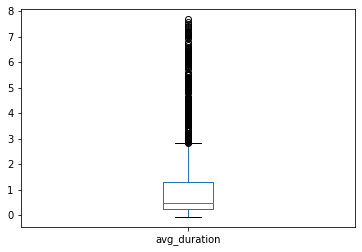

In [46]:
employee_agg_data['avg_duration'].plot.box();

In [47]:
cut_labels_duration = ['<1', '1-3', '3-5','5+']
cut_bins = [0,1,3,5,100]
employee_agg_data['duration_groups'] = pd.cut(employee_agg_data['avg_duration'], bins=cut_bins, labels=cut_labels_duration)

In [48]:
employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,1,Male,C23,Master,2015-12-24,28.0,57387,57387,1,1,571860.0,2.0,1,0.213699,0,No Improvement,0,20-30,<1
1,2,Male,C7,Master,2017-11-06,31.0,67016,67016,2,2,0.0,1.0,0,0.068493,0,No Improvement,0,30-40,<1
2,4,Male,C13,Master,2016-12-07,43.0,65603,65603,2,2,70000.0,1.0,1,0.386301,0,No Improvement,0,40-50,<1
3,5,Male,C9,College,2016-01-09,29.0,46368,46368,1,1,40120.0,1.0,1,0.158904,0,No Improvement,0,20-30,<1
4,6,Female,C11,Bachelor,2017-07-31,31.0,78728,78728,3,3,253000.0,1.6,0,0.336986,0,Improved,0,30-40,<1


In [49]:
test_employee_agg_data = employee_agg_data[employee_agg_data['Emp_ID'].isin(test_data['Emp_ID'])]
test_employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
1,2,Male,C7,Master,2017-11-06,31.000000,67016,67016,2,2,0.000000e+00,1.00,0,0.068493,0,No Improvement,0,30-40,<1
4,6,Female,C11,Bachelor,2017-07-31,31.000000,78728,78728,3,3,2.530000e+05,1.60,0,0.336986,0,Improved,0,30-40,<1
6,11,Female,C19,Master,2017-12-07,28.000000,42172,42172,1,1,0.000000e+00,1.00,0,-0.016438,0,No Improvement,0,20-30,NaN
9,14,Female,C26,College,2017-10-16,39.000000,19734,19734,3,3,0.000000e+00,1.00,0,0.126027,0,No Improvement,0,30-40,<1
17,25,Male,C24,Bachelor,2014-10-30,29.666667,102077,102077,1,3,1.514630e+06,3.75,0,3.090411,0,Improved,1,20-30,3-5


In [50]:
test_employee_agg_data.shape

(741, 19)

In [51]:
employee_agg_data = employee_agg_data[~employee_agg_data['Emp_ID'].isin(test_data['Emp_ID'])]
employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,1,Male,C23,Master,2015-12-24,28.0,57387,57387,1,1,571860.0,2.0,1,0.213699,0,No Improvement,0,20-30,<1
2,4,Male,C13,Master,2016-12-07,43.0,65603,65603,2,2,70000.0,1.0,1,0.386301,0,No Improvement,0,40-50,<1
3,5,Male,C9,College,2016-01-09,29.0,46368,46368,1,1,40120.0,1.0,1,0.158904,0,No Improvement,0,20-30,<1
5,8,Male,C2,College,2017-09-19,34.0,70656,70656,3,3,0.0,1.0,1,0.156164,0,No Improvement,0,30-40,<1
7,12,Male,C23,Master,2016-06-29,35.0,28116,28116,1,1,434530.0,2.5,1,0.479452,0,Dropped,0,30-40,<1


In [52]:
employee_agg_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 0 to 2379
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Emp_ID             1640 non-null   int64         
 1   Gender             1640 non-null   object        
 2   City               1640 non-null   object        
 3   Education_Level    1640 non-null   object        
 4   Dateofjoining      1640 non-null   datetime64[ns]
 5   avg_age            1640 non-null   float64       
 6   min_salary         1640 non-null   int64         
 7   max_salary         1640 non-null   int64         
 8   start_designation  1640 non-null   int64         
 9   end_designation    1640 non-null   int64         
 10  net_bussiness_val  1640 non-null   float64       
 11  avg_rating         1640 non-null   float64       
 12  target             1640 non-null   int64         
 13  avg_duration       1640 non-null   float64       
 14  salary_h

In [53]:
# employee_agg_data['target'] = employee_agg_data['target'].astype('category')
# employee_agg_data['start_designation'] = employee_agg_data['start_designation'].astype('category')
# employee_agg_data['end_designation'] = employee_agg_data['end_designation'].astype('category')

In [54]:
employee_agg_data['avg_rating'] = employee_agg_data['avg_rating'].round(2)
employee_agg_data['avg_age'] = employee_agg_data['avg_age'].astype('int64')
employee_agg_data['avg_duration'] = employee_agg_data['avg_duration'].astype('int64')

In [55]:
employee_agg_data.shape

(1640, 19)

**Multivatriate Analysis**

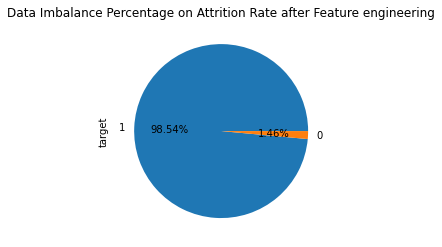

In [56]:
plt.title("Data Imbalance Percentage on Attrition Rate after Feature engineering")
employee_agg_data['target'].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.show()

In [57]:
def countplotter(data,column,figsize):
    plt.figure(figsize=figsize)
    ax = sns.countplot(x=column, data = data, hue='target')
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x,y = p.get_xy() 
        ax.annotate(f'{height/len(data):1.2%}', (x+width/2, y+height+10), ha='center')
    plt.show()

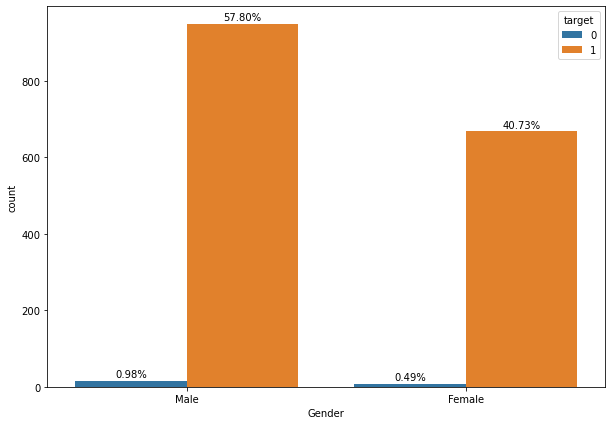

In [58]:
countplotter(employee_agg_data,'Gender',(10,7))

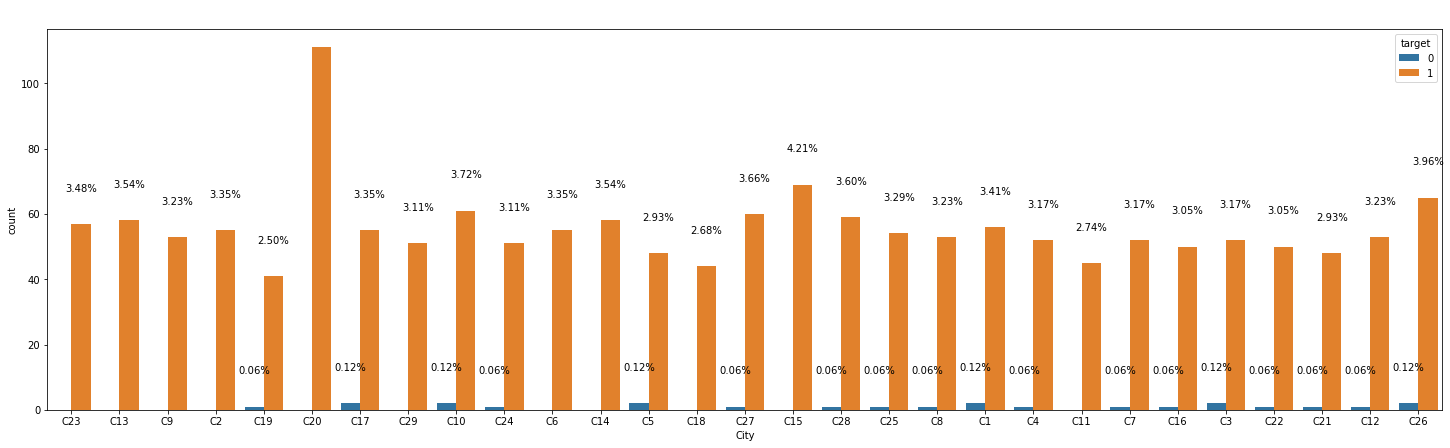

In [59]:
countplotter(employee_agg_data,'City',(25,7))

In [60]:
employee_agg_data.drop(['City'],axis=1,inplace=True)

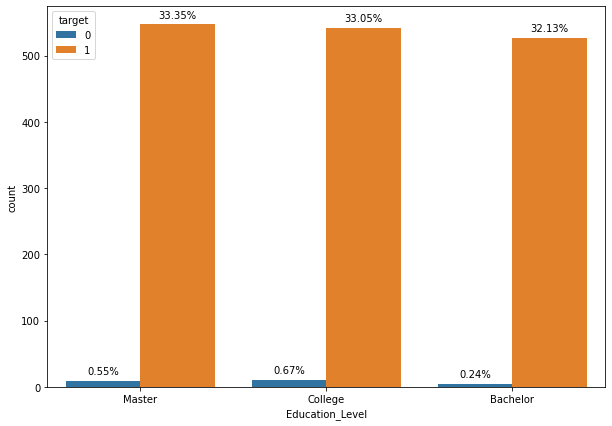

In [61]:
countplotter(employee_agg_data,'Education_Level',(10,7))

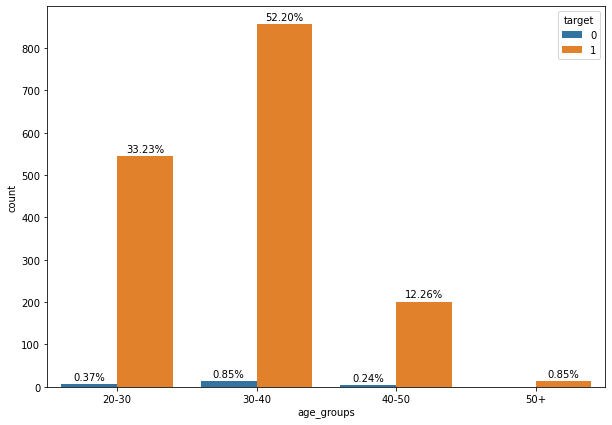

In [62]:
countplotter(employee_agg_data,'age_groups',(10,7))

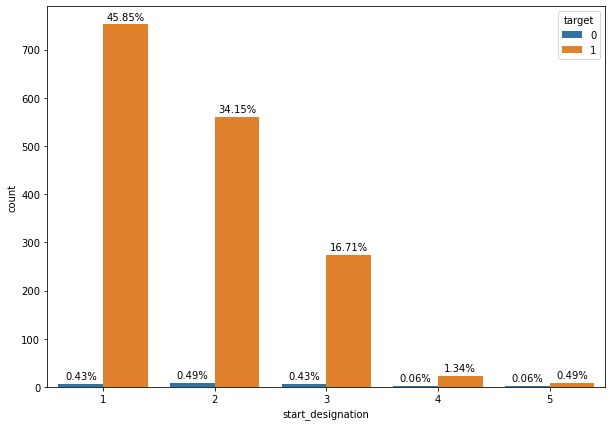

In [63]:
countplotter(employee_agg_data,'start_designation',(10,7))

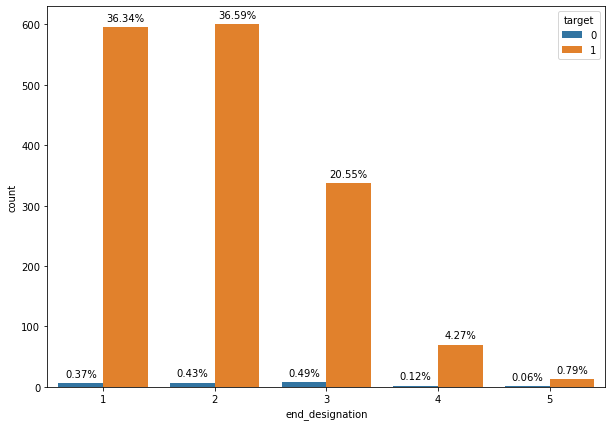

In [64]:
countplotter(employee_agg_data,'end_designation',(10,7))

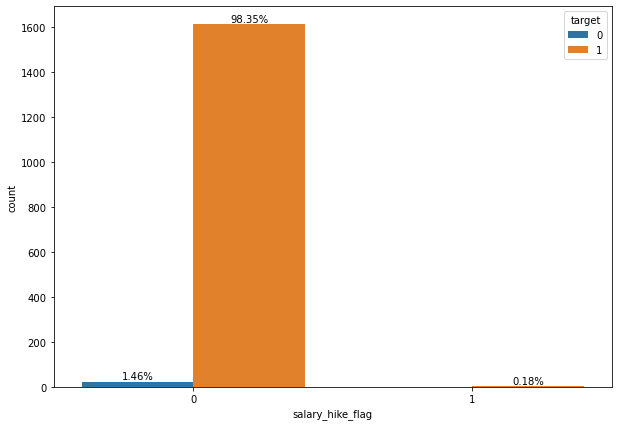

In [65]:
countplotter(employee_agg_data,'salary_hike_flag',(10,7))

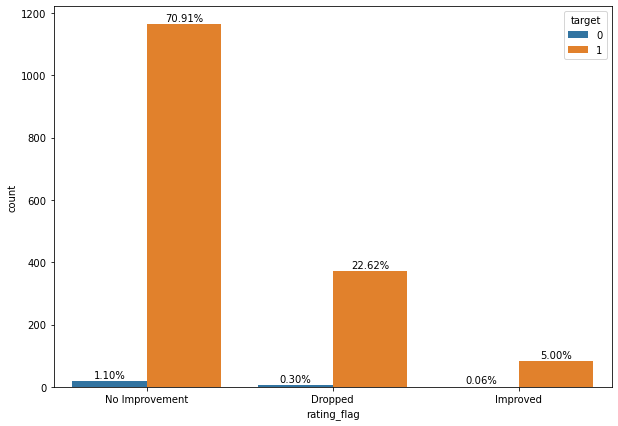

In [66]:
countplotter(employee_agg_data,'rating_flag',(10,7))

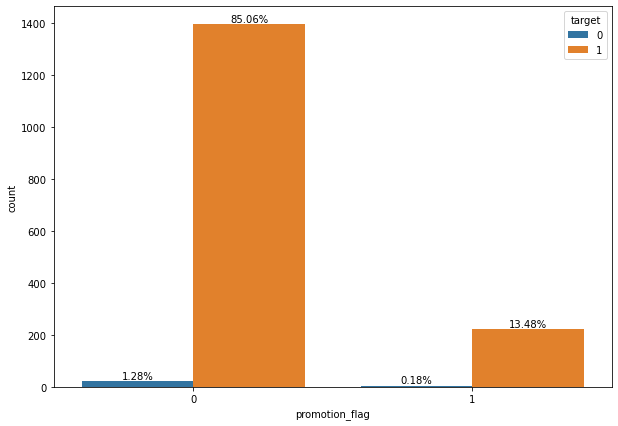

In [67]:
countplotter(employee_agg_data,'promotion_flag',(10,7))

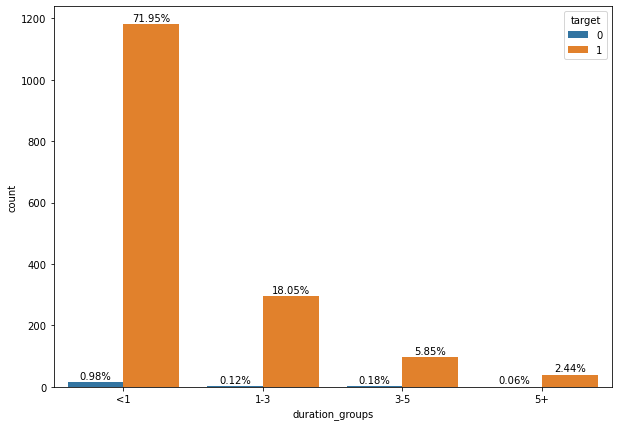

In [68]:
countplotter(employee_agg_data,'duration_groups',(10,7))

In [69]:
def boxplotter(data,column,figsize):
    plt.figure(figsize=figsize)
    sns.boxplot(y=column, x='target',data = data)
    plt.show()

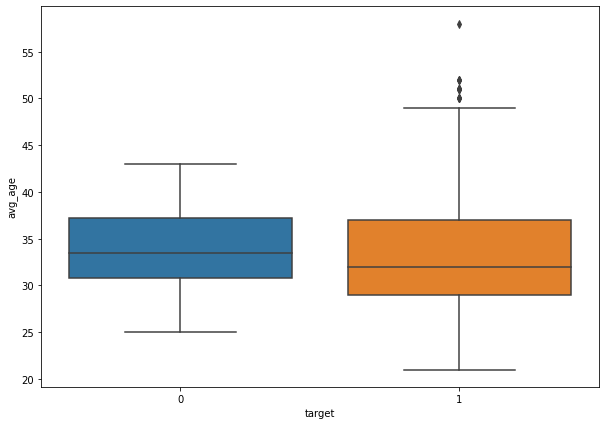

In [70]:
boxplotter(employee_agg_data,'avg_age',(10,7))

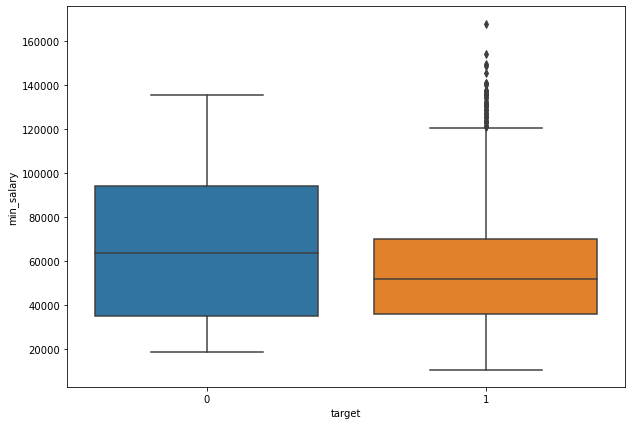

In [71]:
boxplotter(employee_agg_data,'min_salary',(10,7))

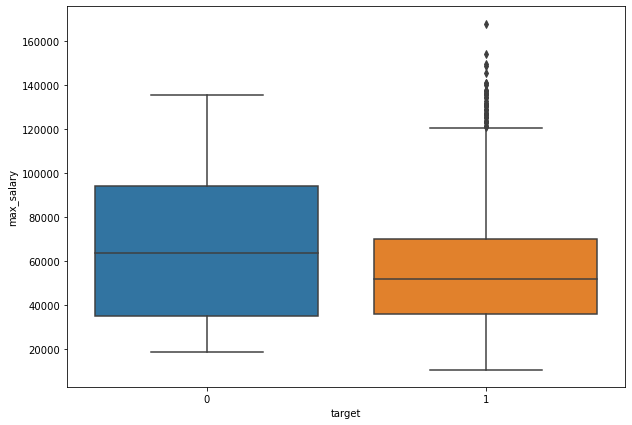

In [72]:
boxplotter(employee_agg_data,'max_salary',(10,7))

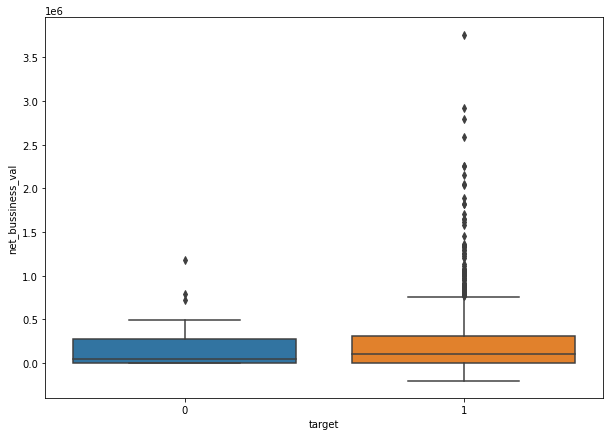

In [73]:
boxplotter(employee_agg_data,'net_bussiness_val',(10,7))

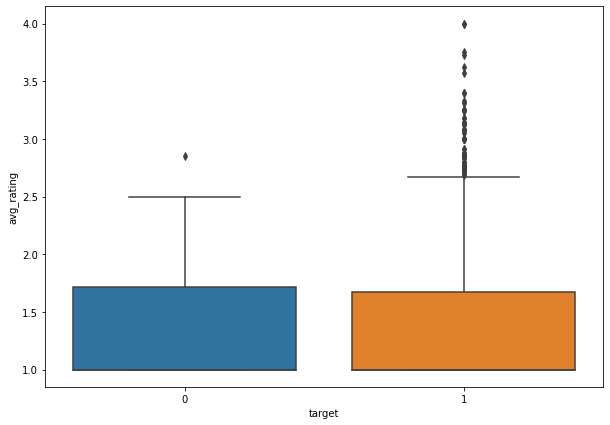

In [74]:
boxplotter(employee_agg_data,'avg_rating',(10,7))

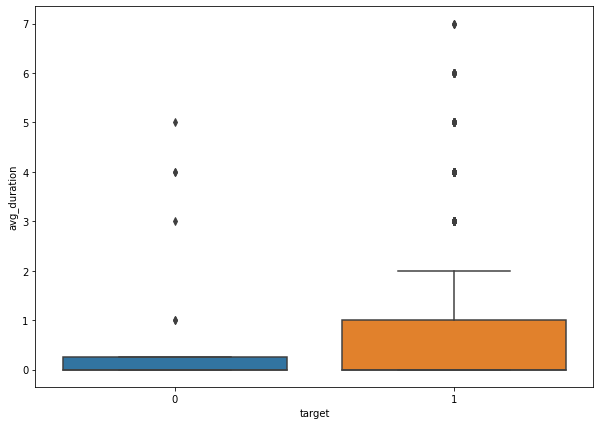

In [75]:
boxplotter(employee_agg_data,'avg_duration',(10,7))

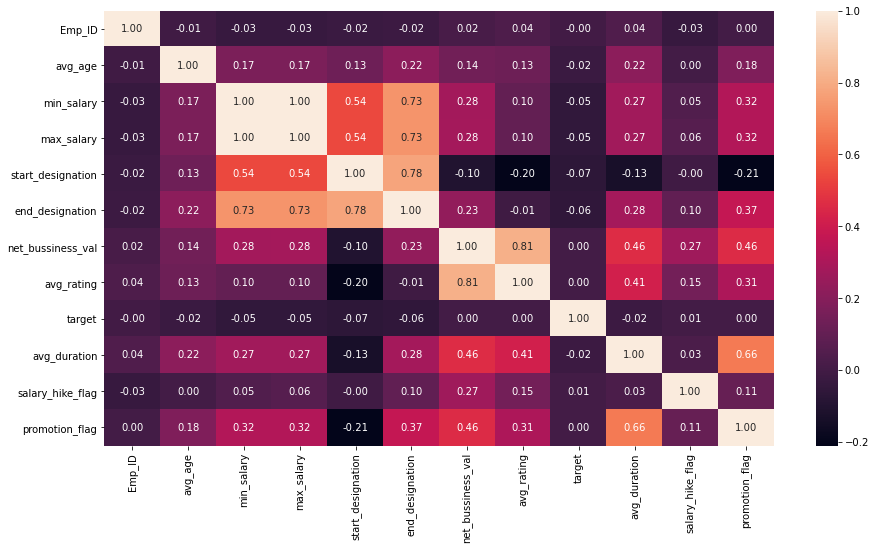

In [76]:
plt.figure(figsize = (15, 8))
sns.heatmap(employee_agg_data.corr(), annot=True, fmt='.2f')
plt.show()

In [77]:
employee_agg_data.drop(['min_salary','max_salary','start_designation'],axis=1,inplace=True)

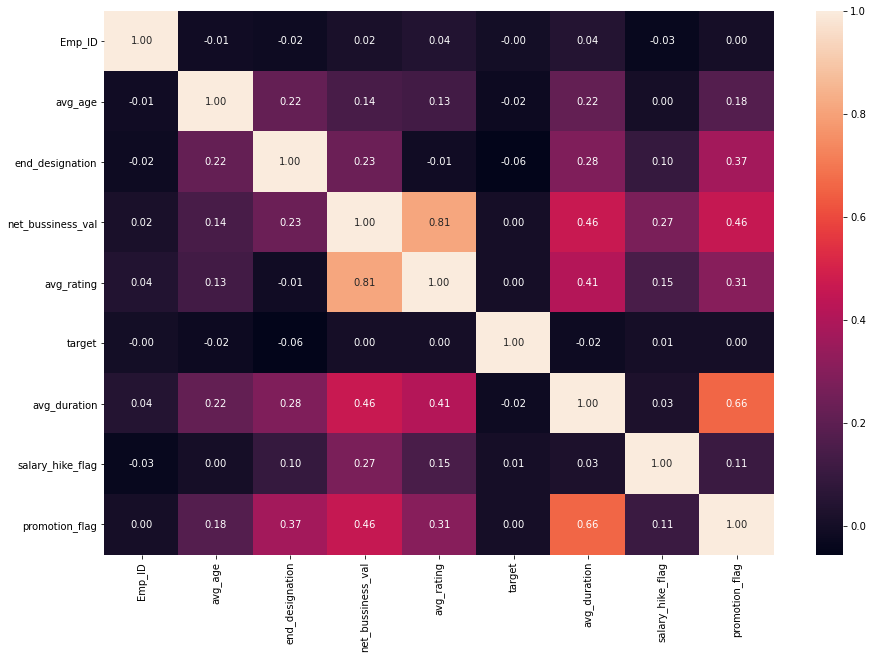

In [78]:
plt.figure(figsize = (15, 10))
sns.heatmap(employee_agg_data.corr(), annot=True, fmt='.2f')
plt.show()

In [79]:
from scipy.stats import skew
num_columns=employee_agg_data.select_dtypes(include=['int64','float64']).columns 
emp_numerical=employee_agg_data[num_columns]
skew_features = emp_numerical.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skewness = pd.DataFrame({'Skew' :high_skew})
pd.DataFrame(skew_features,columns=['Skewness']).head(10)

,Skewness
salary_hike_flag,23.316700
net_bussiness_val,3.619927
avg_duration,2.597574
promotion_flag,2.116511
avg_rating,1.526659
end_designation,0.706919
avg_age,0.545762
Emp_ID,-0.044975
target,-8.083822


In [80]:
employee_agg_data.head()

,Emp_ID,Gender,Education_Level,Dateofjoining,avg_age,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,1,Male,Master,2015-12-24,28,1,571860.0,2.0,1,0,0,No Improvement,0,20-30,<1
2,4,Male,Master,2016-12-07,43,2,70000.0,1.0,1,0,0,No Improvement,0,40-50,<1
3,5,Male,College,2016-01-09,29,1,40120.0,1.0,1,0,0,No Improvement,0,20-30,<1
5,8,Male,College,2017-09-19,34,3,0.0,1.0,1,0,0,No Improvement,0,30-40,<1
7,12,Male,Master,2016-06-29,35,1,434530.0,2.5,1,0,0,Dropped,0,30-40,<1


**Model building**

In [81]:
X = employee_agg_data.drop(['Emp_ID','target','Dateofjoining'], axis=1)
X.head()

,Gender,Education_Level,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,Male,Master,28,1,571860.0,2.0,0,0,No Improvement,0,20-30,<1
2,Male,Master,43,2,70000.0,1.0,0,0,No Improvement,0,40-50,<1
3,Male,College,29,1,40120.0,1.0,0,0,No Improvement,0,20-30,<1
5,Male,College,34,3,0.0,1.0,0,0,No Improvement,0,30-40,<1
7,Male,Master,35,1,434530.0,2.5,0,0,Dropped,0,30-40,<1


In [82]:
y = employee_agg_data['target']

y.head()

0    1
2    1
3    1
5    1
7    1
Name: target, dtype: int64

In [83]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# X['City'] = le.fit_transform(X['City'] )
# X['Education_Level'] = le.fit_transform(X['Education_Level'] )
# X['Gender'] = le.fit_transform(X['Gender'])
# X['age_groups'] = le.fit_transform(X['age_groups'] )
# X['rating_flag'] = le.fit_transform(X['rating_flag'] )
# X['duration_groups'] = le.fit_transform(X['duration_groups'] )

X['rating_flag'] = X['rating_flag'].map({'Dropped':0,'No Improvement':1,'Improved':2})

X =  pd.get_dummies(X, columns=['Gender','Education_Level','age_groups','duration_groups'])

X.head()

,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
0,28,1,571860.0,2.0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0
2,43,2,70000.0,1.0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
3,29,1,40120.0,1.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0
5,34,3,0.0,1.0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0
7,35,1,434530.0,2.5,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [85]:
print(X_train.shape)
print(X_test.shape)

(1148, 21)
(492, 21)


In [86]:
X_train.head()

,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
655,39,3,352744.545455,1.27,2,0,1,1,1,0,0,1,0,0,1,0,0,0,1,0,0
1803,34,3,125155.000000,1.00,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0
2211,34,3,783642.500000,2.50,4,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
1914,29,1,130430.000000,1.00,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0
45,35,1,44886.666667,1.00,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0


In [87]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

cols = X_train.select_dtypes(include=['int64','float64']).columns

scaler = StandardScaler()
X_train[cols] = scaler.fit_transform(X_train[cols])
X_train.head()

,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
655,1.021231,1.126754,0.399370,-0.202872,1.141657,-0.041776,0.361224,2.569562,1,0,0,1,0,0,1,0,0,0,1,0,0
1803,0.172177,1.126754,-0.271579,-0.675919,-0.469434,-0.041776,0.361224,-0.389171,0,1,0,1,0,0,1,0,0,1,0,0,0
2211,0.172177,1.126754,1.669685,1.952122,2.752748,-0.041776,-1.681561,2.569562,0,1,0,1,0,0,1,0,0,0,0,1,0
1914,-0.676876,-1.039936,-0.256028,-0.675919,-0.469434,-0.041776,0.361224,-0.389171,1,0,1,0,0,1,0,0,0,1,0,0,0
45,0.341988,-1.039936,-0.508215,-0.675919,-0.469434,-0.041776,0.361224,-0.389171,1,0,1,0,0,0,1,0,0,1,0,0,0


In [88]:
# handling data imbalance using SMOTE

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train,y_train = smt.fit_resample(X_train,y_train)

In [89]:
print('Shape of train set',X_train.shape)
print('Shape of test set',y_train.shape)

Shape of train set (2266, 21)
Shape of test set (2266,)


In [90]:
# checking if data imbalance is handled

y_train.sum()/(y_train == 0).sum()

1.0

***Logistic Regression***

In [91]:
import statsmodels.api as sm

In [92]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2266
Model:                            GLM   Df Residuals:                     2244
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -264.57
Date:                Sun, 21 Nov 2021   Deviance:                       529.15
Time:                        23:19:59   Pearson chi2:                 3.55e+04
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -100.8316   5.02e+04     -0.002      0.998   -9.86e+04    9.84e+04
avg_age                      0.0656      0.279      0.235      0.814      -0.481       0.612
end_designation              0.3214      0.151      2.136      0.033       0.026       0.616
net_bussiness_val           -0.6888      0.399     -1.724      0.085      -1.472       0.094
avg_rating                   0.7127      0.361      1.973      0.049       0.005       1.421
avg_duration                 0.1777      1.632      0.109      0.913      -3.020       3.376
salary_hike_flag             0.9095   2.72e+04   3.35e-05      1.000   -5.32e+04    5.32e+04
rating_flag                 -0.9431      0.214     -4.404      0.000      -1.363      -0.523
promotion_flag               0.8458      0.633      1.337      0.181      -0.394       2.086
Gender_Female               32.1390   2.98e+04      0.001      0.999   -5.84e+04    5.85e+04
Gender_Male                 29.0444   2.98e+04      0.001      0.999   -5.84e+04    5.85e+04
Education_Level_Bachelor    50.0991   3.01e+04      0.002      0.999   -5.89e+04     5.9e+04
Education_Level_College     46.4002   3.01e+04      0.002      0.999   -5.89e+04     5.9e+04
Education_Level_Master      46.8674   3.01e+04      0.002      0.999   -5.89e+04     5.9e+04
age_groups_20-30            48.0676   3.27e+04      0.001      0.999   -6.41e+04    6.42e+04
age_groups_30-40            44.6364   3.27e+04      0.001      0.999   -6.41e+04    6.42e+04
age_groups_40-50            46.5775   3.27e+04      0.001      0.999   -6.41e+04    6.42e+04
age_groups_50+              65.6221   2.68e+05      0.000      1.000   -5.25e+05    5.26e+05
duration_groups_<1         -18.1817   1.85e+04     -0.001      0.999   -3.63e+04    3.63e+04
duration_groups_1-3        -15.9743   1.85e+04     -0.001      0.999   -3.63e+04    3.63e+04
duration_groups_3-5        -18.2014   1.85e+04     -0.001      0.999   -3.63e+04    3.63e+04
duration_groups_5+         -20.1718   1.85e+04     -0.001      0.999   -3.63e+04    3.63e+04
============================================================================================
"""

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [94]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [95]:
rfe.support_

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [96]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('avg_age', True, 1),
 ('end_designation', False, 2),
 ('net_bussiness_val', True, 1),
 ('avg_rating', True, 1),
 ('avg_duration', True, 1),
 ('salary_hike_flag', True, 1),
 ('rating_flag', True, 1),
 ('promotion_flag', True, 1),
 ('Gender_Female', True, 1),
 ('Gender_Male', True, 1),
 ('Education_Level_Bachelor', True, 1),
 ('Education_Level_College', True, 1),
 ('Education_Level_Master', True, 1),
 ('age_groups_20-30', True, 1),
 ('age_groups_30-40', True, 1),
 ('age_groups_40-50', True, 1),
 ('age_groups_50+', True, 1),
 ('duration_groups_<1', True, 1),
 ('duration_groups_1-3', True, 1),
 ('duration_groups_3-5', True, 1),
 ('duration_groups_5+', True, 1)]

In [97]:
# finalised columns after RFE

col = X_train.columns[rfe.support_]

In [98]:
col

Index(['avg_age', 'net_bussiness_val', 'avg_rating', 'avg_duration',
       'salary_hike_flag', 'rating_flag', 'promotion_flag', 'Gender_Female',
       'Gender_Male', 'Education_Level_Bachelor', 'Education_Level_College',
       'Education_Level_Master', 'age_groups_20-30', 'age_groups_30-40',
       'age_groups_40-50', 'age_groups_50+', 'duration_groups_<1',
       'duration_groups_1-3', 'duration_groups_3-5', 'duration_groups_5+'],
      dtype='object')

In [99]:
X_train.columns[~rfe.support_]

Index(['end_designation'], dtype='object')

In [100]:
# assessing the model with statsModels

In [101]:
X_train = X_train[col]

In [102]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2266
Model:                            GLM   Df Residuals:                     2245
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -266.93
Date:                Sun, 21 Nov 2021   Deviance:                       533.85
Time:                        23:20:14   Pearson chi2:                 2.76e+04
No. Iterations:                    27                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -102.3519   5.01e+04     -0.002      0.998   -9.82e+04     9.8e+04
avg_age                      0.2828      0.258      1.094      0.274      -0.224       0.789
net_bussiness_val           -0.4762      0.397     -1.200      0.230      -1.254       0.302
avg_rating                   0.6032      0.365      1.653      0.098      -0.112       1.318
avg_duration                 0.4709      1.661      0.284      0.777      -2.784       3.726
salary_hike_flag             0.8864   2.72e+04   3.26e-05      1.000   -5.32e+04    5.32e+04
rating_flag                 -0.8699      0.208     -4.189      0.000      -1.277      -0.463
promotion_flag               0.8973      0.620      1.447      0.148      -0.318       2.113
Gender_Female               32.0721      3e+04      0.001      0.999   -5.88e+04    5.88e+04
Gender_Male                 28.9633      3e+04      0.001      0.999   -5.88e+04    5.88e+04
Education_Level_Bachelor    50.7420   2.96e+04      0.002      0.999   -5.79e+04     5.8e+04
Education_Level_College     46.9468   2.96e+04      0.002      0.999   -5.79e+04     5.8e+04
Education_Level_Master      47.4774   2.96e+04      0.002      0.999   -5.79e+04     5.8e+04
age_groups_20-30            49.3351   3.27e+04      0.002      0.999    -6.4e+04    6.41e+04
age_groups_30-40            45.7286   3.27e+04      0.001      0.999    -6.4e+04    6.41e+04
age_groups_40-50            47.3436   3.27e+04      0.001      0.999    -6.4e+04    6.41e+04
age_groups_50+              66.0238   2.66e+05      0.000      1.000   -5.21e+05    5.21e+05
duration_groups_<1         -18.1665   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
duration_groups_1-3        -16.2513   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
duration_groups_3-5        -18.8274   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
duration_groups_5+         -21.2240   1.84e+04     -0.001      0.999    -3.6e+04     3.6e+04
============================================================================================
"""

In [103]:
X_train.drop(['age_groups_50+'],axis=1,inplace=True)

In [104]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2266
Model:                            GLM   Df Residuals:                     2246
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.30
Date:                Sun, 21 Nov 2021   Deviance:                       538.60
Time:                        23:20:34   Pearson chi2:                 4.34e+04
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -65.1531   2.47e+04     -0.003      0.998   -4.85e+04    4.84e+04
avg_age                      0.4444      0.242      1.836      0.066      -0.030       0.919
net_bussiness_val           -0.3960      0.408     -0.971      0.331      -1.195       0.403
avg_rating                   0.5941      0.360      1.649      0.099      -0.112       1.300
avg_duration                 0.2584      1.112      0.232      0.816      -1.921       2.438
salary_hike_flag             0.7393   1.65e+04   4.49e-05      1.000   -3.23e+04    3.23e+04
rating_flag                 -0.9218      0.212     -4.351      0.000      -1.337      -0.507
promotion_flag               1.3387      0.557      2.405      0.016       0.248       2.430
Gender_Female               31.0525   1.83e+04      0.002      0.999   -3.58e+04    3.59e+04
Gender_Male                 27.9855   1.83e+04      0.002      0.999   -3.58e+04    3.59e+04
Education_Level_Bachelor    34.4678   1.66e+04      0.002      0.998   -3.26e+04    3.26e+04
Education_Level_College     30.4718   1.66e+04      0.002      0.999   -3.26e+04    3.26e+04
Education_Level_Master      30.9397   1.66e+04      0.002      0.999   -3.26e+04    3.26e+04
age_groups_20-30            11.3748      1.354      8.401      0.000       8.721      14.028
age_groups_30-40             7.5388      1.155      6.525      0.000       5.274       9.803
age_groups_40-50             8.8590      1.340      6.611      0.000       6.233      11.485
duration_groups_<1           0.3853      2.631      0.146      0.884      -4.771       5.541
duration_groups_1-3          3.0738      2.472      1.244      0.214      -1.771       7.918
duration_groups_3-5          0.1891      2.854      0.066      0.947      -5.404       5.782
duration_groups_5+          -2.7168      4.533     -0.599      0.549     -11.601       6.167
============================================================================================
"""

In [105]:
X_train.drop('salary_hike_flag',axis=1,inplace=True)

In [106]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2266
Model:                            GLM   Df Residuals:                     2247
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.30
Date:                Sun, 21 Nov 2021   Deviance:                       538.60
Time:                        23:20:50   Pearson chi2:                 4.34e+04
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -65.1843   2.47e+04     -0.003      0.998   -4.85e+04    4.84e+04
avg_age                      0.4444      0.242      1.836      0.066      -0.030       0.919
net_bussiness_val           -0.3960      0.408     -0.971      0.331      -1.195       0.403
avg_rating                   0.5941      0.360      1.649      0.099      -0.112       1.300
avg_duration                 0.2585      1.112      0.232      0.816      -1.921       2.438
rating_flag                 -0.9218      0.212     -4.352      0.000      -1.337      -0.507
promotion_flag               1.3388      0.557      2.405      0.016       0.248       2.430
Gender_Female               31.0525   1.83e+04      0.002      0.999   -3.58e+04    3.59e+04
Gender_Male                 27.9855   1.83e+04      0.002      0.999   -3.58e+04    3.59e+04
Education_Level_Bachelor    34.4681   1.66e+04      0.002      0.998   -3.26e+04    3.26e+04
Education_Level_College     30.4721   1.66e+04      0.002      0.999   -3.26e+04    3.26e+04
Education_Level_Master      30.9400   1.66e+04      0.002      0.999   -3.26e+04    3.26e+04
age_groups_20-30            11.3750      1.354      8.402      0.000       8.721      14.029
age_groups_30-40             7.5390      1.155      6.525      0.000       5.275       9.803
age_groups_40-50             8.8592      1.340      6.612      0.000       6.233      11.485
duration_groups_<1           0.3853      2.631      0.146      0.884      -4.771       5.542
duration_groups_1-3          3.0738      2.472      1.244      0.214      -1.771       7.918
duration_groups_3-5          0.1890      2.854      0.066      0.947      -5.404       5.782
duration_groups_5+          -2.7173      4.532     -0.600      0.549     -11.601       6.166
============================================================================================
"""

In [107]:
X_train.drop(['Gender_Female'],axis=1,inplace=True)

In [108]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2266
Model:                            GLM   Df Residuals:                     2248
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -492.73
Date:                Sun, 21 Nov 2021   Deviance:                       985.46
Time:                        23:21:07   Pearson chi2:                 6.32e+03
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -33.7838   1.15e+04     -0.003      0.998   -2.26e+04    2.26e+04
avg_age                      0.2350      0.186      1.263      0.206      -0.130       0.600
net_bussiness_val           -0.4152      0.314     -1.323      0.186      -1.030       0.200
avg_rating                   0.2999      0.263      1.142      0.254      -0.215       0.815
avg_duration                -0.3829      0.798     -0.480      0.631      -1.946       1.180
rating_flag                 -0.6054      0.136     -4.448      0.000      -0.872      -0.339
promotion_flag               1.1647      0.465      2.506      0.012       0.254       2.076
Gender_Male                  0.3047      0.162      1.876      0.061      -0.014       0.623
Education_Level_Bachelor    31.7955   1.15e+04      0.003      0.998   -2.26e+04    2.26e+04
Education_Level_College     27.6433   1.15e+04      0.002      0.998   -2.26e+04    2.26e+04
Education_Level_Master      27.8019   1.15e+04      0.002      0.998   -2.26e+04    2.26e+04
age_groups_20-30             9.1066      1.050      8.675      0.000       7.049      11.164
age_groups_30-40             7.5572      0.965      7.835      0.000       5.667       9.448
age_groups_40-50             9.6156      1.131      8.504      0.000       7.399      11.832
duration_groups_<1          -0.8652      1.508     -0.574      0.566      -3.821       2.091
duration_groups_1-3          3.9415      1.707      2.309      0.021       0.596       7.287
duration_groups_3-5          2.0947      2.160      0.970      0.332      -2.139       6.328
duration_groups_5+           1.6618      3.405      0.488      0.625      -5.011       8.335
============================================================================================
"""

In [109]:
X_train.drop(['Education_Level_Bachelor'],axis=1,inplace=True)

In [110]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2266
Model:                            GLM   Df Residuals:                     2249
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -857.51
Date:                Sun, 21 Nov 2021   Deviance:                       1715.0
Time:                        23:21:20   Pearson chi2:                 5.14e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -8.1448      0.961     -8.478      0.000     -10.028      -6.262
avg_age                     0.0130      0.146      0.089      0.929      -0.274       0.300
net_bussiness_val           0.4205      0.300      1.401      0.161      -0.168       1.009
avg_rating                 -0.0010      0.227     -0.004      0.997      -0.446       0.444
avg_duration               -3.4268      1.003     -3.416      0.001      -5.393      -1.461
rating_flag                -0.6633      0.114     -5.838      0.000      -0.886      -0.441
promotion_flag              1.2575      0.459      2.738      0.006       0.357       2.158
Gender_Male                 0.3592      0.123      2.925      0.003       0.119       0.600
Education_Level_College     0.9960      0.143      6.951      0.000       0.715       1.277
Education_Level_Master      1.1018      0.148      7.462      0.000       0.812       1.391
age_groups_20-30            6.1298      0.699      8.771      0.000       4.760       7.500
age_groups_30-40            4.9588      0.666      7.441      0.000       3.653       6.265
age_groups_40-50            7.6582      0.857      8.939      0.000       5.979       9.337
duration_groups_<1          1.5981      0.945      1.691      0.091      -0.254       3.450
duration_groups_1-3        10.4819      1.493      7.022      0.000       7.556      13.408
duration_groups_3-5        15.0687      2.911      5.176      0.000       9.363      20.774
duration_groups_5+         17.8271      4.405      4.047      0.000       9.194      26.460
===========================================================================================
"""

In [111]:
X_train.drop(['avg_rating'],axis=1,inplace=True)

In [112]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2266
Model:                            GLM   Df Residuals:                     2250
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -857.51
Date:                Sun, 21 Nov 2021   Deviance:                       1715.0
Time:                        23:21:46   Pearson chi2:                 5.14e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -8.1450      0.959     -8.489      0.000     -10.026      -6.264
avg_age                     0.0130      0.146      0.089      0.929      -0.274       0.300
net_bussiness_val           0.4193      0.154      2.722      0.006       0.117       0.721
avg_duration               -3.4269      1.003     -3.417      0.001      -5.393      -1.461
rating_flag                -0.6633      0.114     -5.841      0.000      -0.886      -0.441
promotion_flag              1.2578      0.453      2.775      0.006       0.370       2.146
Gender_Male                 0.3592      0.123      2.926      0.003       0.119       0.600
Education_Level_College     0.9960      0.143      6.953      0.000       0.715       1.277
Education_Level_Master      1.1018      0.147      7.486      0.000       0.813       1.390
age_groups_20-30            6.1297      0.699      8.774      0.000       4.760       7.499
age_groups_30-40            4.9589      0.666      7.445      0.000       3.653       6.264
age_groups_40-50            7.6582      0.857      8.939      0.000       5.979       9.337
duration_groups_<1          1.5983      0.944      1.694      0.090      -0.251       3.448
duration_groups_1-3        10.4817      1.492      7.025      0.000       7.557      13.406
duration_groups_3-5        15.0688      2.911      5.177      0.000       9.364      20.774
duration_groups_5+         17.8284      4.394      4.057      0.000       9.216      26.441
===========================================================================================
"""

In [113]:
X_train.drop(['avg_age'],axis=1,inplace=True)

In [114]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2266
Model:                            GLM   Df Residuals:                     2251
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -857.51
Date:                Sun, 21 Nov 2021   Deviance:                       1715.0
Time:                        23:22:11   Pearson chi2:                 5.26e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -8.1406      0.958     -8.501      0.000     -10.017      -6.264
net_bussiness_val           0.4183      0.154      2.723      0.006       0.117       0.719
avg_duration               -3.4346      1.001     -3.431      0.001      -5.396      -1.473
rating_flag                -0.6637      0.114     -5.847      0.000      -0.886      -0.441
promotion_flag              1.2637      0.449      2.812      0.005       0.383       2.145
Gender_Male                 0.3602      0.122      2.947      0.003       0.121       0.600
Education_Level_College     0.9935      0.140      7.080      0.000       0.718       1.268
Education_Level_Master      1.1020      0.147      7.487      0.000       0.813       1.390
age_groups_20-30            6.1129      0.671      9.113      0.000       4.798       7.428
age_groups_30-40            4.9596      0.665      7.463      0.000       3.657       6.262
age_groups_40-50            7.6775      0.828      9.274      0.000       6.055       9.300
duration_groups_<1          1.5951      0.944      1.690      0.091      -0.255       3.445
duration_groups_1-3        10.5071      1.467      7.162      0.000       7.632      13.383
duration_groups_3-5        15.1030      2.891      5.225      0.000       9.438      20.769
duration_groups_5+         17.8602      4.387      4.071      0.000       9.262      26.458
===========================================================================================
"""

In [115]:
X_train.drop(['duration_groups_<1'],axis=1,inplace=True)

In [116]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                 2266
Model:                            GLM   Df Residuals:                     2252
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -859.07
Date:                Sun, 21 Nov 2021   Deviance:                       1718.1
Time:                        23:23:02   Pearson chi2:                 1.02e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -7.2038      0.750     -9.604      0.000      -8.674      -5.734
net_bussiness_val           0.4250      0.153      2.776      0.005       0.125       0.725
avg_duration               -4.6604      0.795     -5.865      0.000      -6.218      -3.103
rating_flag                -0.6624      0.114     -5.835      0.000      -0.885      -0.440
promotion_flag              1.3121      0.448      2.927      0.003       0.434       2.191
Gender_Male                 0.3545      0.122      2.904      0.004       0.115       0.594
Education_Level_College     0.9955      0.140      7.100      0.000       0.721       1.270
Education_Level_Master      1.1030      0.147      7.497      0.000       0.815       1.391
age_groups_20-30            6.2092      0.681      9.114      0.000       4.874       7.545
age_groups_30-40            5.0621      0.675      7.500      0.000       3.739       6.385
age_groups_40-50            7.7409      0.833      9.296      0.000       6.109       9.373
duration_groups_1-3        10.5352      1.535      6.861      0.000       7.526      13.545
duration_groups_3-5        17.3882      2.788      6.237      0.000      11.924      22.853
duration_groups_5+         22.1841      3.987      5.564      0.000      14.369      29.999
===========================================================================================
"""

In [117]:
X_train_sm = sm.add_constant(X_train)

In [118]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.999371
1    0.629637
2    0.999872
3    0.582826
4    0.284981
5    0.999922
6    0.994767
7    0.959309
8    0.628426
9    0.531671
dtype: float64

In [119]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9993708 , 0.62963695, 0.9998719 , 0.58282575, 0.28498088,
       0.99992181, 0.99476679, 0.9593086 , 0.62842575, 0.53167056])

In [120]:
y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})
y_train_pred_final.head()

,Attrition,Attrition_Prob
0,1,0.999371
1,1,0.629637
2,1,0.999872
3,1,0.582826
4,1,0.284981


In [121]:
y_train_pred_final['predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Attrition,Attrition_Prob,predicted
0,1,0.999371,1
1,1,0.629637,1
2,1,0.999872,1
3,1,0.582826,1
4,1,0.284981,0


In [122]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
print(confusion)

[[813 320]
 [146 987]]


In [123]:
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))

0.794351279788173


In [124]:
from sklearn.metrics import f1_score

f1_score(y_train_pred_final.Attrition, y_train_pred_final.predicted)

0.809016393442623

In [125]:
def calculate_evaluation(confusion):
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print("Sensitivity = ",TP / float(TP+FN))

    print("Specificity = ",TN / float(TN+FP))

    # calculate false postive rate - predicting churn when customer hasn't churned
    print("False Positive Rate = ",FP/ float(TN+FP))

    # positive predictive value 
    print ("Precision = ",TP / float(TP+FP))

    # negative predictive value
    print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

In [126]:
#Function to plot accuracy metrics
def model_metrics(name,actual, predicted):
    confusion = confusion_matrix(actual, predicted)
    TP=confusion[1,1] #True positives
    TN= confusion[0,0] #True Negatives
    FP=confusion[0,1] #False Positives
    FN= confusion[1,0] #False Negatives
    acc_score = round(accuracy_score(actual, predicted),2) #accuracy score
    rcl_score=round(recall_score(actual, predicted),2) #recall score
    roc_score = round(roc_auc_score(actual, predicted),2) # roc_auc score
    fpr = round(FP/float(TN+FP),2) #False Positive Ration
    specificity = round(TN/float(TN+FP),2) #False Positive Ration
    metrics_df = pd.DataFrame(data=[[name,acc_score,roc_score,fpr,\
                                     specificity,rcl_score,TP,\
                                     TN,FP,FN,]],columns=['model','accuracy','roc_auc','fpr','specificity','recall_score',\
                                                          'true_positive','true_negative',\
                                                          'false_positive','false_negative'])
    return metrics_df

In [127]:
calculate_evaluation(confusion)

Sensitivity =  0.8711385701676964
Specificity =  0.7175639894086496
False Positive Rate =  0.2824360105913504
Precision =  0.7551644988523336
True Negative Prediction Rate =  0.8477580813347236


In [128]:
# plot ROC curve 

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

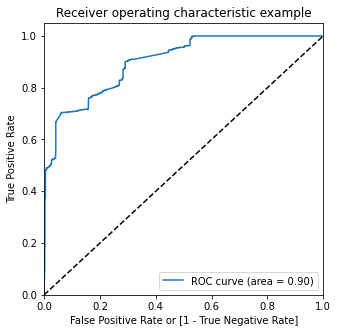

In [129]:
draw_roc(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)

In [130]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Attrition,Attrition_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.999371,1,1,1,1,1,1,1,1,1,1,1
1,1,0.629637,1,1,1,1,1,1,1,1,0,0,0
2,1,0.999872,1,1,1,1,1,1,1,1,1,1,1
3,1,0.582826,1,1,1,1,1,1,1,0,0,0,0
4,1,0.284981,0,1,1,1,0,0,0,0,0,0,0


In [131]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.734334  0.999117  0.469550
0.2   0.2  0.733010  0.992056  0.473963
0.3   0.3  0.743601  0.949691  0.537511
0.4   0.4  0.793910  0.878199  0.709620
0.5   0.5  0.794351  0.871139  0.717564
0.6   0.6  0.792586  0.714034  0.871139
0.7   0.7  0.762577  0.566637  0.958517
0.8   0.8  0.739629  0.490733  0.988526
0.9   0.9  0.672992  0.348632  0.997352


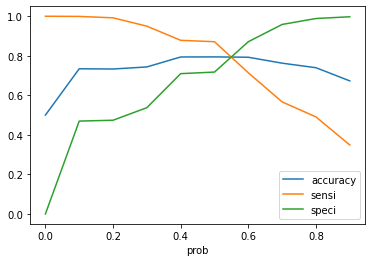

In [132]:
# plotting accuracy, sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

,Attrition,Attrition_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.999371,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.629637,1,1,1,1,1,1,1,1,0,0,0,1
2,1,0.999872,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.582826,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.284981,0,1,1,1,0,0,0,0,0,0,0,0


In [134]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.final_predicted )
confusion2

array([[895, 238],
       [243, 890]])

In [135]:
calculate_evaluation(confusion2)

Sensitivity =  0.7855251544571933
Specificity =  0.7899382171226832
False Positive Rate =  0.21006178287731686
Precision =  0.7890070921985816
True Negative Prediction Rate =  0.7864674868189807


In [136]:
# f1 score
from sklearn.metrics import f1_score

f1_score(y_train_pred_final.Attrition, y_train_pred_final.final_predicted)

0.7872622733303848

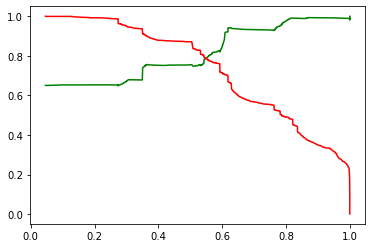

In [137]:
# plotting precision vs recall tradeoff

from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Attrition, y_train_pred_final.Attrition_Prob)


plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [138]:
from sklearn.metrics import precision_score, recall_score

In [139]:
#Precision
precision_score(y_train_pred_final.Attrition, y_train_pred_final.predicted)

0.7551644988523336

In [140]:
#Recall
recall_score(y_train_pred_final.Attrition, y_train_pred_final.predicted)

0.8711385701676964

In [141]:
X_test.head()

,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
1015,25,2,28812.000000,1.00,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0
1954,30,2,0.000000,1.00,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0
1448,32,1,122968.750000,1.38,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0
904,46,3,369803.333333,1.33,5,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
2029,36,1,163536.000000,1.60,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0


In [142]:
# making predictions on test set

cols = X_test.select_dtypes(include=['int64','float64']).columns


X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
1015,-1.356119,0.043409,-0.555604,-0.675919,-0.469434,-0.041776,0.361224,-0.389171,0,1,0,1,0,1,0,0,0,1,0,0,0
1954,-0.507066,0.043409,-0.640544,-0.675919,-0.469434,-0.041776,0.361224,2.569562,1,0,1,0,0,1,0,0,0,1,0,0,0
1448,-0.167444,-1.039936,-0.278024,-0.010149,-0.469434,-0.041776,0.361224,-0.389171,1,0,0,1,0,0,1,0,0,1,0,0,0
904,2.209906,1.126754,0.449660,-0.097750,3.558293,-0.041776,-1.681561,2.569562,0,1,0,0,1,0,0,1,0,0,0,0,1
2029,0.511799,-1.039936,-0.158429,0.375297,-0.469434,-0.041776,-1.681561,-0.389171,1,0,0,0,1,0,1,0,0,1,0,0,0


In [143]:
X_train.columns

Index(['net_bussiness_val', 'avg_duration', 'rating_flag', 'promotion_flag',
       'Gender_Male', 'Education_Level_College', 'Education_Level_Master',
       'age_groups_20-30', 'age_groups_30-40', 'age_groups_40-50',
       'duration_groups_1-3', 'duration_groups_3-5', 'duration_groups_5+'],
      dtype='object')

In [144]:
# X_test.drop(['salary_hike_percentage','rating_flag','avg_age','City'],axis=1,inplace=True)
X_test = X_test[X_train.columns]
X_test.head()

,net_bussiness_val,avg_duration,rating_flag,promotion_flag,Gender_Male,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
1015,-0.555604,-0.469434,0.361224,-0.389171,1,1,0,1,0,0,0,0,0
1954,-0.640544,-0.469434,0.361224,2.569562,0,0,0,1,0,0,0,0,0
1448,-0.278024,-0.469434,0.361224,-0.389171,0,1,0,0,1,0,0,0,0
904,0.449660,3.558293,-1.681561,2.569562,1,0,1,0,0,1,0,0,1
2029,-0.158429,-0.469434,-1.681561,-0.389171,0,0,1,0,1,0,0,0,0


In [145]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1015    0.825930
1954    0.982928
1448    0.543248
904     0.999995
2029    0.843547
1518    0.999247
2301    0.628426
1909    0.394682
1806    0.971356
404     0.349411
dtype: float64

In [146]:
# Converting y_pred & y_test to a dataframe which are numpy arrays

y_pred_1 = pd.DataFrame(y_test_pred)
y_test_df = pd.DataFrame(y_test)

In [147]:

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [148]:
y_pred_final.head()

,target,0
1015,1,0.825930
1954,1,0.982928
1448,1,0.543248
904,1,0.999995
2029,1,0.843547


In [149]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Attrition_Prob'})
y_pred_final.head()

,target,Attrition_Prob
1015,1,0.825930
1954,1,0.982928
1448,1,0.543248
904,1,0.999995
2029,1,0.843547


In [150]:
# choosing optimal cutoff 

y_pred_final['final_predicted'] = y_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_pred_final.head()

,target,Attrition_Prob,final_predicted
1015,1,0.825930,1
1954,1,0.982928,1
1448,1,0.543248,0
904,1,0.999995,1
2029,1,0.843547,1


In [151]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.target, y_pred_final.final_predicted)

0.7398373983739838

In [152]:
# f1 score
from sklearn.metrics import f1_score

f1_score(y_pred_final.target, y_pred_final.final_predicted)

0.8497652582159625

In [153]:
confusion2test = metrics.confusion_matrix(y_pred_final.target, y_pred_final.final_predicted )
confusion2test

array([[  2,   7],
       [121, 362]])

In [154]:
#Evalatuation calculation
calculate_evaluation(confusion2test)

Sensitivity =  0.7494824016563147
Specificity =  0.2222222222222222
False Positive Rate =  0.7777777777777778
Precision =  0.981029810298103
True Negative Prediction Rate =  0.016260162601626018


In [155]:
## 1st submission

In [156]:
test_data.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [157]:
test_employee_agg_data.head()

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
1,2,Male,C7,Master,2017-11-06,31.000000,67016,67016,2,2,0.000000e+00,1.00,0,0.068493,0,No Improvement,0,30-40,<1
4,6,Female,C11,Bachelor,2017-07-31,31.000000,78728,78728,3,3,2.530000e+05,1.60,0,0.336986,0,Improved,0,30-40,<1
6,11,Female,C19,Master,2017-12-07,28.000000,42172,42172,1,1,0.000000e+00,1.00,0,-0.016438,0,No Improvement,0,20-30,NaN
9,14,Female,C26,College,2017-10-16,39.000000,19734,19734,3,3,0.000000e+00,1.00,0,0.126027,0,No Improvement,0,30-40,<1
17,25,Male,C24,Bachelor,2014-10-30,29.666667,102077,102077,1,3,1.514630e+06,3.75,0,3.090411,0,Improved,1,20-30,3-5


In [158]:
test_data_final = pd.merge(test_data,test_employee_agg_data,how='inner',on='Emp_ID')
test_data_final

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,394,Female,C20,Master,2011-06-06,33.250000,97722,97722,2,4,1.144092e+06,2.125,0,6.493151,0,Improved,1,30-40,5+
1,173,Male,C28,College,2011-06-13,38.166667,56174,56174,1,3,8.277621e+05,2.750,0,6.473973,0,Improved,1,30-40,5+
2,1090,Male,C13,College,2011-06-27,37.916667,96750,96750,2,4,2.099270e+06,2.750,0,6.435616,0,Dropped,1,30-40,5+
3,840,Female,C8,College,2011-07-11,39.500000,88813,88813,1,4,7.139183e+05,1.500,0,6.397260,0,Improved,1,30-40,5+
4,308,Male,C5,Master,2011-08-15,30.916667,188418,188418,2,5,2.417687e+06,2.625,0,6.301370,0,Dropped,1,30-40,5+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2134,Male,C29,College,2010-10-30,38.750000,116006,116006,2,5,2.487352e+06,2.875,0,7.093151,0,Dropped,1,30-40,5+
737,2255,Male,C25,College,2010-11-06,38.750000,133489,133489,3,4,1.516587e+06,2.625,0,7.073973,0,Improved,1,30-40,5+
738,448,Male,C10,Bachelor,2011-04-04,36.000000,65389,65389,2,4,1.263282e+06,2.125,0,6.665753,0,No Improvement,1,30-40,5+
739,1644,Female,C9,Bachelor,2011-04-28,46.833333,105513,105513,2,4,1.201782e+06,2.125,0,6.600000,0,Dropped,1,40-50,5+


In [159]:
test_data_final

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,394,Female,C20,Master,2011-06-06,33.250000,97722,97722,2,4,1.144092e+06,2.125,0,6.493151,0,Improved,1,30-40,5+
1,173,Male,C28,College,2011-06-13,38.166667,56174,56174,1,3,8.277621e+05,2.750,0,6.473973,0,Improved,1,30-40,5+
2,1090,Male,C13,College,2011-06-27,37.916667,96750,96750,2,4,2.099270e+06,2.750,0,6.435616,0,Dropped,1,30-40,5+
3,840,Female,C8,College,2011-07-11,39.500000,88813,88813,1,4,7.139183e+05,1.500,0,6.397260,0,Improved,1,30-40,5+
4,308,Male,C5,Master,2011-08-15,30.916667,188418,188418,2,5,2.417687e+06,2.625,0,6.301370,0,Dropped,1,30-40,5+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2134,Male,C29,College,2010-10-30,38.750000,116006,116006,2,5,2.487352e+06,2.875,0,7.093151,0,Dropped,1,30-40,5+
737,2255,Male,C25,College,2010-11-06,38.750000,133489,133489,3,4,1.516587e+06,2.625,0,7.073973,0,Improved,1,30-40,5+
738,448,Male,C10,Bachelor,2011-04-04,36.000000,65389,65389,2,4,1.263282e+06,2.125,0,6.665753,0,No Improvement,1,30-40,5+
739,1644,Female,C9,Bachelor,2011-04-28,46.833333,105513,105513,2,4,1.201782e+06,2.125,0,6.600000,0,Dropped,1,40-50,5+


In [160]:
test_data_final.drop(['Emp_ID','Dateofjoining','min_salary','max_salary','target','start_designation','City'],axis=1,inplace=True)

In [161]:
# # test_data_final['City'] = le.fit_transform(test_data_final['City'] )
# test_data_final['Education_Level'] = le.fit_transform(test_data_final['Education_Level'] )
# test_data_final['Gender'] = le.fit_transform(test_data_final['Gender'])
# test_data_final['age_groups'] = le.fit_transform(test_data_final['age_groups'] )
# test_data_final['duration_groups'] = le.fit_transform(test_data_final['duration_groups'] )
# test_data_final['rating_flag'] = le.fit_transform(test_data_final['rating_flag'] )
# test_data_final['City'] = le.fit_transform(test_data_final['City'] )

test_data_final['rating_flag'] = test_data_final['rating_flag'].map({'Dropped':0,'No Improvement':1,'Improved':2})

test_data_final =  pd.get_dummies(test_data_final, columns=['Gender','Education_Level','age_groups','duration_groups'])

test_data_final.head()

,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
0,33.250000,4,1.144092e+06,2.125,6.493151,0,2,1,1,0,0,0,1,0,1,0,0,0,0,0,1
1,38.166667,3,8.277621e+05,2.750,6.473973,0,2,1,0,1,0,1,0,0,1,0,0,0,0,0,1
2,37.916667,4,2.099270e+06,2.750,6.435616,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1
3,39.500000,4,7.139183e+05,1.500,6.397260,0,2,1,1,0,0,1,0,0,1,0,0,0,0,0,1
4,30.916667,5,2.417687e+06,2.625,6.301370,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1


In [162]:
# making predictions on test set
cols = test_data_final.select_dtypes(include=['int64','float64']).columns

test_data_final[cols] = scaler.transform(test_data_final[cols])
test_data_final.head()

,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
0,0.044819,2.210099,2.732315,1.295112,4.761094,-0.041776,2.404010,2.569562,1,0,0,0,1,0,1,0,0,0,0,0,1
1,0.879722,1.126754,1.799753,2.390129,4.745645,-0.041776,2.404010,2.569562,0,1,0,1,0,0,1,0,0,0,0,0,1
2,0.837270,2.210099,5.548242,2.390129,4.714748,-0.041776,-1.681561,2.569562,0,1,0,1,0,0,1,0,0,0,0,0,1
3,1.106137,2.210099,1.464134,0.200094,4.683850,-0.041776,2.404010,2.569562,1,0,0,1,0,0,1,0,0,0,0,0,1
4,-0.351406,3.293444,6.486955,2.171126,4.606606,-0.041776,-1.681561,2.569562,0,1,0,0,1,0,1,0,0,0,0,0,1


In [163]:
# test_data_final.drop(['salary_hike_percentage','rating_flag','avg_age','City'],axis=1,inplace=True)
test_data_final = test_data_final[X_train.columns]
test_data_final.head()

,net_bussiness_val,avg_duration,rating_flag,promotion_flag,Gender_Male,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
0,2.732315,4.761094,2.404010,2.569562,0,0,1,0,1,0,0,0,1
1,1.799753,4.745645,2.404010,2.569562,1,1,0,0,1,0,0,0,1
2,5.548242,4.714748,-1.681561,2.569562,1,1,0,0,1,0,0,0,1
3,1.464134,4.683850,2.404010,2.569562,0,1,0,0,1,0,0,0,1
4,6.486955,4.606606,-1.681561,2.569562,1,0,1,0,1,0,0,0,1


In [164]:
test_data_final_sm = sm.add_constant(test_data_final)
y_test_pred = res.predict(test_data_final_sm)
y_test_pred[:10]

0    0.869585
1    0.860564
2    0.998099
3    0.833529
4    0.999307
5    0.948555
6    0.982398
7    0.996445
8    0.994300
9    0.997607
dtype: float64

In [165]:
# Converting y_pred & y_test to a dataframe which are numpy arrays

y_pred_final = pd.DataFrame(y_test_pred)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Attrition_Prob'})
y_pred_final['final_predicted'] = y_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.55 else 0)
y_pred_final.head()


,Attrition_Prob,final_predicted
0,0.869585,1
1,0.860564,1
2,0.998099,1
3,0.833529,1
4,0.999307,1


In [166]:
final_sub_df = pd.concat([test_data,y_pred_final],axis=1)
final_sub_df.drop('Attrition_Prob',axis=1,inplace=True)
final_sub_df =  final_sub_df.rename(columns={ 'final_predicted' : 'Target'})


In [167]:
final_sub_df.head()

,Emp_ID,Target
0,394,1
1,173,1
2,1090,1
3,840,1
4,308,1


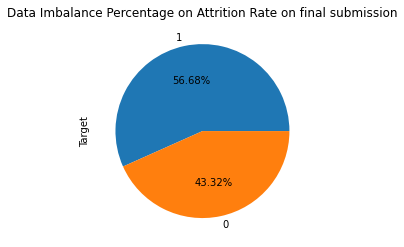

In [168]:
plt.title("Data Imbalance Percentage on Attrition Rate on final submission")
final_sub_df['Target'].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.show()

In [169]:
final_sub_df.to_csv('sub_v6.csv', index=False)

In [170]:
employee_agg_data

,Emp_ID,Gender,Education_Level,Dateofjoining,avg_age,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,1,Male,Master,2015-12-24,28,1,571860.000000,2.00,1,0,0,No Improvement,0,20-30,<1
2,4,Male,Master,2016-12-07,43,2,70000.000000,1.00,1,0,0,No Improvement,0,40-50,<1
3,5,Male,College,2016-01-09,29,1,40120.000000,1.00,1,0,0,No Improvement,0,20-30,<1
5,8,Male,College,2017-09-19,34,3,0.000000,1.00,1,0,0,No Improvement,0,30-40,<1
7,12,Male,Master,2016-06-29,35,1,434530.000000,2.50,1,0,0,Dropped,0,30-40,<1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,2779,Male,College,2017-01-26,28,3,0.000000,1.00,1,0,0,No Improvement,0,20-30,<1
2375,2782,Male,Bachelor,2016-05-16,26,1,0.000000,1.00,1,0,0,No Improvement,0,20-30,<1
2377,2785,Female,College,2017-08-28,34,1,0.000000,1.00,1,0,0,No Improvement,0,30-40,<1
2378,2786,Male,College,2015-07-31,44,2,312787.777778,1.67,1,1,0,Dropped,0,40-50,1-3


### Tree models

In [175]:
X = employee_agg_data.drop(['Emp_ID','target','Dateofjoining'], axis=1)
X.head()

,Gender,Education_Level,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,Male,Master,28,1,571860.0,2.0,0,0,No Improvement,0,20-30,<1
2,Male,Master,43,2,70000.0,1.0,0,0,No Improvement,0,40-50,<1
3,Male,College,29,1,40120.0,1.0,0,0,No Improvement,0,20-30,<1
5,Male,College,34,3,0.0,1.0,0,0,No Improvement,0,30-40,<1
7,Male,Master,35,1,434530.0,2.5,0,0,Dropped,0,30-40,<1


In [176]:
y = employee_agg_data['target']

y.head()

0    1
2    1
3    1
5    1
7    1
Name: target, dtype: int64

In [177]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# X['City'] = le.fit_transform(X['City'] )
# X['Education_Level'] = le.fit_transform(X['Education_Level'] )
# X['Gender'] = le.fit_transform(X['Gender'])
# X['age_groups'] = le.fit_transform(X['age_groups'] )
# X['end_designation'] = X['end_designation'].astype('int64')
# X.head()


X['rating_flag'] = X['rating_flag'].map({'Dropped':0,'No Improvement':1,'Improved':2})

X =  pd.get_dummies(X, columns=['Gender','Education_Level','age_groups','duration_groups'])

X.head()

,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
0,28,1,571860.0,2.0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0
2,43,2,70000.0,1.0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0
3,29,1,40120.0,1.0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0
5,34,3,0.0,1.0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0
7,35,1,434530.0,2.5,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [178]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [179]:
print(X_train.shape)
print(X_test.shape)

(1312, 21)
(328, 21)


In [180]:
X_train.head()

,avg_age,end_designation,net_bussiness_val,avg_rating,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
91,32,1,4.196833e+04,1.00,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0
1905,30,1,1.556375e+05,1.00,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0
1496,29,2,0.000000e+00,1.00,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0
1538,36,3,1.341959e+06,2.12,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0
1755,33,2,0.000000e+00,1.00,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0


In [181]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1312 entries, 91 to 1649
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   avg_age                   1312 non-null   int64  
 1   end_designation           1312 non-null   int64  
 2   net_bussiness_val         1312 non-null   float64
 3   avg_rating                1312 non-null   float64
 4   avg_duration              1312 non-null   int64  
 5   salary_hike_flag          1312 non-null   int64  
 6   rating_flag               1312 non-null   int64  
 7   promotion_flag            1312 non-null   int64  
 8   Gender_Female             1312 non-null   uint8  
 9   Gender_Male               1312 non-null   uint8  
 10  Education_Level_Bachelor  1312 non-null   uint8  
 11  Education_Level_College   1312 non-null   uint8  
 12  Education_Level_Master    1312 non-null   uint8  
 13  age_groups_20-30          1312 non-null   uint8  
 14  age_gro

In [182]:
# handling data imbalance using SMOTE

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42)
X_train,y_train = smt.fit_resample(X_train,y_train)

In [183]:
print('Shape of train set',X_train.shape)
print('Shape of test set',y_train.shape)

Shape of train set (2592, 21)
Shape of test set (2592,)


In [184]:
# checking if data imbalance is handled

y_train.sum()/(y_train == 0).sum()

1.0

**Decision Tree**

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [186]:
dt = DecisionTreeClassifier(random_state=42)

In [187]:
params = {
    "max_depth": [2,3,5,10,20,50,100],
    "min_samples_leaf": [5,10,20,50,100,500,1000]
}

In [188]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [189]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 49 candidates, totalling 196 fits
CPU times: user 303 ms, sys: 72.7 ms, total: 375 ms
Wall time: 11.3 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 50, 100],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500, 1000]},
             scoring='f1', verbose=1)

In [190]:
grid_search.best_score_

0.9798967989845876

In [191]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

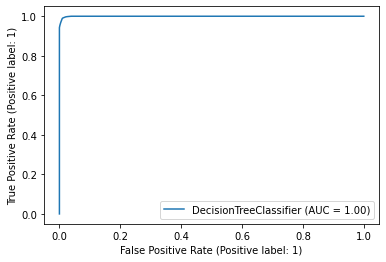

In [192]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(dt_best, X_train, y_train)
plt.show()

**Random Forest**

In [193]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [194]:
params = {
    'max_depth': [5,10,50,100],
    'min_samples_leaf': [10,50,100,200],
    'n_estimators': [10, 50, 100, 500, 1000]
}

In [195]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="f1")

In [196]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits
CPU times: user 3.58 s, sys: 369 ms, total: 3.95 s
Wall time: 1min 43s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50, 100],
                         'min_samples_leaf': [10, 50, 100, 200],
                         'n_estimators': [10, 50, 100, 500, 1000]},
             scoring='f1', verbose=1)

In [197]:
grid_search.best_score_

0.9892401714648402

In [198]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=50, min_samples_leaf=10, n_estimators=1000,
                       n_jobs=-1, random_state=42)

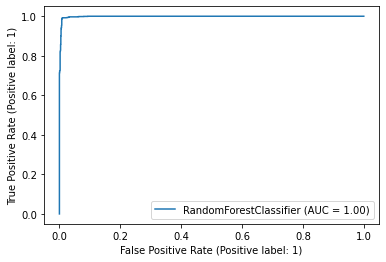

In [199]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [200]:
rf_best.feature_importances_

array([0.07416827, 0.02576624, 0.05172869, 0.02776272, 0.01620463,
       0.        , 0.00863922, 0.02407106, 0.08876239, 0.07120908,
       0.16087895, 0.07344984, 0.06073104, 0.13560745, 0.05779237,
       0.01211406, 0.        , 0.04804484, 0.05524667, 0.00735135,
       0.00047115])

In [201]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [202]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
10,Education_Level_Bachelor,0.160879
13,age_groups_20-30,0.135607
8,Gender_Female,0.088762
0,avg_age,0.074168
11,Education_Level_College,0.073450
9,Gender_Male,0.071209
12,Education_Level_Master,0.060731
14,age_groups_30-40,0.057792
18,duration_groups_1-3,0.055247
2,net_bussiness_val,0.051729


In [203]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,roc_auc_score

y_test_pred= rf_best.predict(X_test)
print('Classification Report:\n')
print(classification_report(y_test,y_test_pred))
print('Confusion Matrix:\n')
print(confusion_matrix(y_test,y_test_pred))
model_metrics("Random Forest",y_test,y_test_pred)

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.98      0.99      0.98       320

    accuracy                           0.97       328
   macro avg       0.49      0.50      0.49       328
weighted avg       0.95      0.97      0.96       328

Confusion Matrix:

[[  0   8]
 [  2 318]]


,model,accuracy,roc_auc,fpr,specificity,recall_score,true_positive,true_negative,false_positive,false_negative
0,Random Forest,0.97,0.5,1.0,0.0,0.99,318,0,8,2


In [204]:
test_data_final = pd.merge(test_data,test_employee_agg_data,how='inner',on='Emp_ID')
test_data_final

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,394,Female,C20,Master,2011-06-06,33.250000,97722,97722,2,4,1.144092e+06,2.125,0,6.493151,0,Improved,1,30-40,5+
1,173,Male,C28,College,2011-06-13,38.166667,56174,56174,1,3,8.277621e+05,2.750,0,6.473973,0,Improved,1,30-40,5+
2,1090,Male,C13,College,2011-06-27,37.916667,96750,96750,2,4,2.099270e+06,2.750,0,6.435616,0,Dropped,1,30-40,5+
3,840,Female,C8,College,2011-07-11,39.500000,88813,88813,1,4,7.139183e+05,1.500,0,6.397260,0,Improved,1,30-40,5+
4,308,Male,C5,Master,2011-08-15,30.916667,188418,188418,2,5,2.417687e+06,2.625,0,6.301370,0,Dropped,1,30-40,5+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2134,Male,C29,College,2010-10-30,38.750000,116006,116006,2,5,2.487352e+06,2.875,0,7.093151,0,Dropped,1,30-40,5+
737,2255,Male,C25,College,2010-11-06,38.750000,133489,133489,3,4,1.516587e+06,2.625,0,7.073973,0,Improved,1,30-40,5+
738,448,Male,C10,Bachelor,2011-04-04,36.000000,65389,65389,2,4,1.263282e+06,2.125,0,6.665753,0,No Improvement,1,30-40,5+
739,1644,Female,C9,Bachelor,2011-04-28,46.833333,105513,105513,2,4,1.201782e+06,2.125,0,6.600000,0,Dropped,1,40-50,5+


In [205]:
test_data_final

,Emp_ID,Gender,City,Education_Level,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,age_groups,duration_groups
0,394,Female,C20,Master,2011-06-06,33.250000,97722,97722,2,4,1.144092e+06,2.125,0,6.493151,0,Improved,1,30-40,5+
1,173,Male,C28,College,2011-06-13,38.166667,56174,56174,1,3,8.277621e+05,2.750,0,6.473973,0,Improved,1,30-40,5+
2,1090,Male,C13,College,2011-06-27,37.916667,96750,96750,2,4,2.099270e+06,2.750,0,6.435616,0,Dropped,1,30-40,5+
3,840,Female,C8,College,2011-07-11,39.500000,88813,88813,1,4,7.139183e+05,1.500,0,6.397260,0,Improved,1,30-40,5+
4,308,Male,C5,Master,2011-08-15,30.916667,188418,188418,2,5,2.417687e+06,2.625,0,6.301370,0,Dropped,1,30-40,5+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,2134,Male,C29,College,2010-10-30,38.750000,116006,116006,2,5,2.487352e+06,2.875,0,7.093151,0,Dropped,1,30-40,5+
737,2255,Male,C25,College,2010-11-06,38.750000,133489,133489,3,4,1.516587e+06,2.625,0,7.073973,0,Improved,1,30-40,5+
738,448,Male,C10,Bachelor,2011-04-04,36.000000,65389,65389,2,4,1.263282e+06,2.125,0,6.665753,0,No Improvement,1,30-40,5+
739,1644,Female,C9,Bachelor,2011-04-28,46.833333,105513,105513,2,4,1.201782e+06,2.125,0,6.600000,0,Dropped,1,40-50,5+


In [206]:
# test_data_final['City'] = le.fit_transform(test_data_final['City'] )
# test_data_final['Education_Level'] = le.fit_transform(test_data_final['Education_Level'] )
# test_data_final['Gender'] = le.fit_transform(test_data_final['Gender'])
# test_data_final['age_groups'] = le.fit_transform(test_data_final['age_groups'] )
# test_data_final['end_designation'] = test_data_final['end_designation'].astype('int64')


test_data_final['rating_flag'] = test_data_final['rating_flag'].map({'Dropped':0,'No Improvement':1,'Improved':2})

test_data_final =  pd.get_dummies(test_data_final, columns=['Gender','Education_Level','age_groups','duration_groups'])

test_data_final.head()

,Emp_ID,City,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
0,394,C20,2011-06-06,33.250000,97722,97722,2,4,1.144092e+06,2.125,0,6.493151,0,2,1,1,0,0,0,1,0,1,0,0,0,0,0,1
1,173,C28,2011-06-13,38.166667,56174,56174,1,3,8.277621e+05,2.750,0,6.473973,0,2,1,0,1,0,1,0,0,1,0,0,0,0,0,1
2,1090,C13,2011-06-27,37.916667,96750,96750,2,4,2.099270e+06,2.750,0,6.435616,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1
3,840,C8,2011-07-11,39.500000,88813,88813,1,4,7.139183e+05,1.500,0,6.397260,0,2,1,1,0,0,1,0,0,1,0,0,0,0,0,1
4,308,C5,2011-08-15,30.916667,188418,188418,2,5,2.417687e+06,2.625,0,6.301370,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1


In [207]:
test_data_final.head()

,Emp_ID,City,Dateofjoining,avg_age,min_salary,max_salary,start_designation,end_designation,net_bussiness_val,avg_rating,target,avg_duration,salary_hike_flag,rating_flag,promotion_flag,Gender_Female,Gender_Male,Education_Level_Bachelor,Education_Level_College,Education_Level_Master,age_groups_20-30,age_groups_30-40,age_groups_40-50,age_groups_50+,duration_groups_<1,duration_groups_1-3,duration_groups_3-5,duration_groups_5+
0,394,C20,2011-06-06,33.250000,97722,97722,2,4,1.144092e+06,2.125,0,6.493151,0,2,1,1,0,0,0,1,0,1,0,0,0,0,0,1
1,173,C28,2011-06-13,38.166667,56174,56174,1,3,8.277621e+05,2.750,0,6.473973,0,2,1,0,1,0,1,0,0,1,0,0,0,0,0,1
2,1090,C13,2011-06-27,37.916667,96750,96750,2,4,2.099270e+06,2.750,0,6.435616,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1
3,840,C8,2011-07-11,39.500000,88813,88813,1,4,7.139183e+05,1.500,0,6.397260,0,2,1,1,0,0,1,0,0,1,0,0,0,0,0,1
4,308,C5,2011-08-15,30.916667,188418,188418,2,5,2.417687e+06,2.625,0,6.301370,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1


In [208]:
test_data_final.drop(['Emp_ID','Dateofjoining','min_salary','max_salary','target','start_designation','City'],axis=1,inplace=True)

In [209]:

y_test_pred = rf_best.predict(test_data_final)
y_test_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [210]:
# Converting y_pred & y_test to a dataframe which are numpy arrays

y_pred_final = pd.DataFrame(y_test_pred)
y_pred_final= y_pred_final.rename(columns={ 0 : 'Target'})
# y_pred_final['final_predicted'] = y_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()


,Target
0,1
1,1
2,1
3,1
4,1


In [211]:
final_sub_df = pd.concat([test_data,y_pred_final],axis=1)

In [212]:
final_sub_df.head()

,Emp_ID,Target
0,394,1
1,173,1
2,1090,1
3,840,1
4,308,1


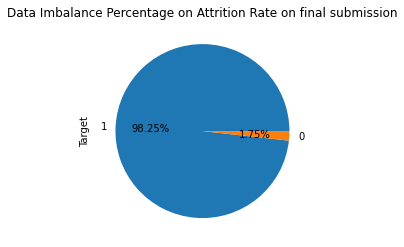

In [213]:
plt.title("Data Imbalance Percentage on Attrition Rate on final submission")
final_sub_df['Target'].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
plt.show()

In [370]:
# final_sub_df.to_csv('sub_v2.csv', index=False)